In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [ ]:
def sigmoid(x):
  return 1/(1+(np.exp(-x)))

In [ ]:
x = np.random.randn(5000,1)
y = (x[:,0]>0)*2 -1

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 42)

In [ ]:
dcs = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)

In [ ]:
dcs.fit(x_train,y_train)
dcs.score(x_train,y_train)

1.0

In [ ]:
clf = GradientBoostingClassifier(n_estimators= 5000,learning_rate=0.01,max_depth =3,random_state=0)
clf.fit(x_train,y_train)
score = clf.predict(x_test)
scorea = clf.predict_proba(x_test)

log_loss(y_test,scorea)


0.00031390885399099544

In [ ]:
def compute_loss(y_true , y_pred):
  return log_loss(y_true,sigmoid(y_pred))
cumulative = np.array([x for x in clf.staged_decision_function(x_test)])[:,:,0]
compute_loss(y_test,cumulative[-1,:]),compute_loss(y_test,cumulative[-2,:]),compute_loss(y_test,cumulative[-1,:]-cumulative[0,:])
cumulative

array([[ 4.16094898e-03, -3.58416112e-02,  4.16094898e-03, ...,
        -3.58416112e-02, -3.58416112e-02,  4.16094898e-03],
       [ 2.41194259e-02, -5.54895421e-02,  2.41194259e-02, ...,
        -5.54895421e-02, -5.54895421e-02,  2.41194259e-02],
       [ 4.38811172e-02, -7.49497613e-02,  4.38811172e-02, ...,
        -7.49497613e-02, -7.49497613e-02,  4.38811172e-02],
       ...,
       [ 8.05833787e+00, -8.07434324e+00,  8.05833787e+00, ...,
        -8.07434324e+00, -8.07434324e+00,  8.05833787e+00],
       [ 8.05833787e+00, -8.07434324e+00,  8.05833787e+00, ...,
        -8.07434324e+00, -8.07434324e+00,  8.05833787e+00],
       [ 8.05833787e+00, -8.07434324e+00,  8.05833787e+00, ...,
        -8.07434324e+00, -8.07434324e+00,  8.05833787e+00]])

([<matplotlib.lines.Line2D at 0x7f50372c30b8>],)

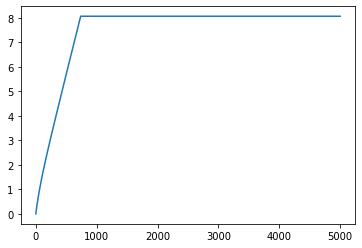

In [ ]:
plt.plot(cumulative[:,y_test==1][:,0]),

In [ ]:
clf = GradientBoostingClassifier(n_estimators = 5000,learning_rate=8,max_depth = 3,random_state= 0)
clf.fit(x_train,y_train)
y_probe= clf.predict_proba(x_test)
cumulative = np.array([x for x in clf.staged_decision_function(x_test)])[:,:,0]

log_loss(y_test,y_probe),compute_loss(y_test,cumulative[-1,:]),compute_loss(y_test,cumulative[-2,:]),compute_loss(y_test,cumulative[-1,:]-cumulative[0,:])

(3.10846460803843e-06,
 3.10846460803843e-06,
 3.0156669363591662e-06,
 2.0896290888781537)

In [ ]:
x,y= make_hastie_10_2(random_state=0)
x,y

(array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.15135721,
         -0.10321885,  0.4105985 ],
        [ 0.14404357,  1.45427351,  0.76103773, ..., -0.20515826,
          0.3130677 , -0.85409574],
        [-2.55298982,  0.6536186 ,  0.8644362 , ..., -0.18718385,
          1.53277921,  1.46935877],
        ...,
        [ 0.19986465,  0.26134578, -0.1279868 , ..., -0.51718289,
          0.07969414,  1.01612661],
        [-0.15167316, -1.42519962,  1.07092211, ..., -1.20676602,
         -1.04746487,  0.0075881 ],
        [-0.09708998,  0.78044425,  0.22108152, ...,  2.53170549,
         -0.03572203,  0.17320019]]),
 array([ 1., -1.,  1., ..., -1., -1.,  1.]))